In [104]:
#import the libraries
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd
import pickle
import seaborn as sns

import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn import preprocessing


### IMPORTING DATA IN CHUNKS BECAUSE SIZE OF DATA IS VERY LARGE

In [64]:
pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(0) ,'rb')
test_df = pd.read_csv('/Users/shiksharawat/Desktop/test.csv')
df = pickle.load(pickle_in)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [59]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [65]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
#Points to be noticed : 
    #1. minimum fare_amount in training data is negative so rows with negative value should be dropped.
    #2. minimum passenger_count is 0 and maximum is 208. The standard deviation is also not high so most 
       #of the values must be close to average value that is 1. Also for test data has maximum value for 
        #passenger_count as 6. So other values can be safely dropped.
    #3. for pickup and dropoff latitudes and logitude the standard deviation is high.
    #4. Also the minimum and maximum value of latitude and longitude lie outside boundary of NYC. So, they have, 
        #to be analized and dropped accordingly.
#longitude = -74.0063889(nyc)
#lattitude = 40.7141667(nyc)

### EXPLORATORY DATA ANALYSIS

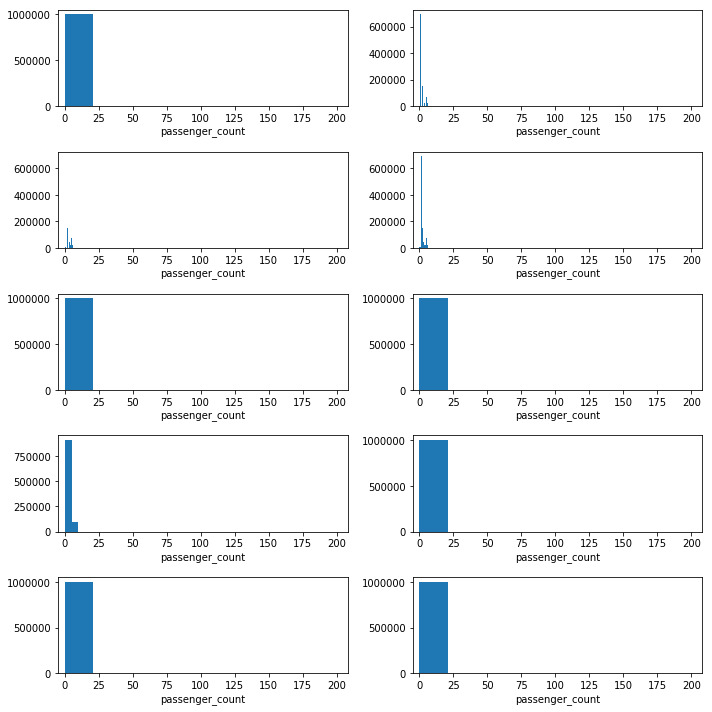

In [60]:
#analysis of passenger_count
fig, axs = plt.subplots(5, 2, figsize=(10, 10))
l = 0
k = 0
for i in range(0,10):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    axs[l%5][k%2].hist(df['passenger_count'])
    axs[l%5][k%2].set_xlabel('passenger_count')
    axs[l%5][k%2].set_xlim((-5,208))
    l+=1
    k+=1
plt.tight_layout()  

### Point 2 is verified from above plots so dropping values above 6. 

In [66]:
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df = df[df['passenger_count']<=6]
    df = df[df['passenger_count']>=0]
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()
    

### PREPROCESSING FOR FARE_AMOUNT

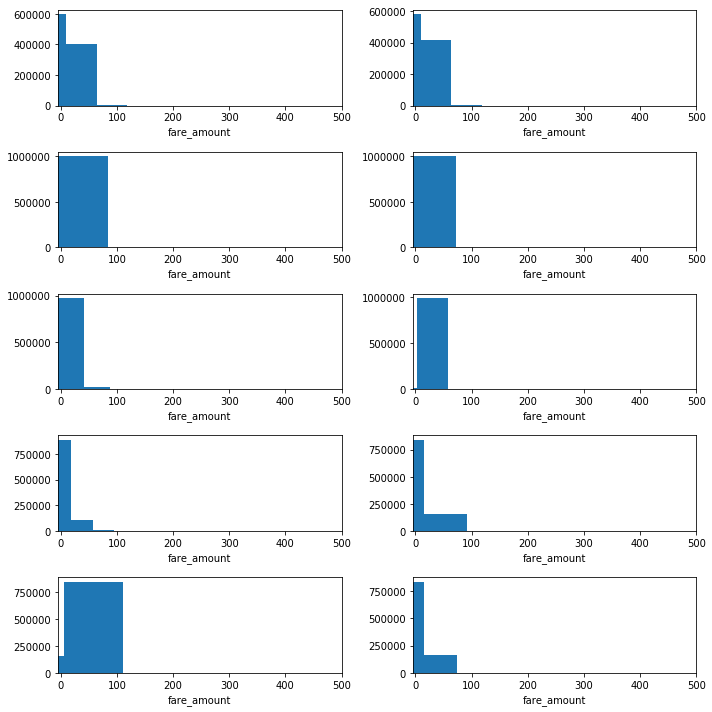

In [70]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10))
l = 0
k = 0
#for loop for analyzing about 10 chunks together.
for i in range(0,10):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    axs[l%5][k%2].hist(df['fare_amount'])
    axs[l%5][k%2].set_xlabel('fare_amount')
    axs[l%5][k%2].set_xlim((-5,500))
    l+=1
    k+=1
plt.tight_layout()

### It can be concluded from above plots that fare amount for most of the chunks does not exceed 60 dollars. Also, some chunks have fare amount less than 0(which makes no sense). 

In [72]:
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df = df[df['fare_amount']<60]
    df = df[df['fare_amount']>=0]
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()
    

### Analysis for null values. 

In [73]:
null_count_fare = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_fare+=df['fare_amount'].isnull().sum(axis = 0)
print(null_count_fare)

0


In [74]:
null_count_passenger = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_passenger+=df['passenger_count'].isnull().sum(axis = 0)
print(null_count_passenger)

0


In [60]:
null_count_dropoff_latitude = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_dropoff_latitude+=df['dropoff_latitude'].isnull().sum(axis = 0)
print(null_count_dropoff_latitude)

376


In [61]:
null_count_dropoff_longitude = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_dropoff_longitude+=df['dropoff_longitude'].isnull().sum(axis = 0)
print(null_count_dropoff_longitude)

376


In [62]:
null_count_pickup_longitude = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_pickup_longitude+=df['pickup_longitude'].isnull().sum(axis = 0)
print(null_count_pickup_longitude)

0


In [63]:
null_count_pickup_latitude = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_pickup_latitude+=df['pickup_latitude'].isnull().sum(axis = 0)
print(null_count_pickup_latitude)

0


In [64]:
null_count_pickup_datetime = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_pickup_latitude+=df['pickup_datetime'].isnull().sum(axis = 0)
print(null_count_pickup_datetime)

0


### Out of approximately 55million rows the number of rows with missing data is very very less. So, we can safely drop rows with any missing data.

In [78]:
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df["key"] = pd.to_datetime(df["key"])
    df.dropna(how='any',inplace = True)
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()

In [ ]:
#Removing those data points which are outside the boundary of New York City.
#Decide the minimum and maximum valus of latitude and longitude from the test dataset.

In [79]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
        
BB = (-74.263242, -72.986532 , 40.573143 , 41.709555)
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    #print('Old size: %d' % len(df))
    df = df[select_within_boundingbox(df, BB)]
    #print('New size: %d' % len(df))
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()


### Introducing new feature

In [85]:
# add time information

for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df["key"] = pd.to_datetime(df["key"])
    df['hour'] = df.key.dt.hour
    df['month'] = df.key.dt.month
    df['weekday'] = df.key.dt.weekday
    df['year'] = df.key.dt.year
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()


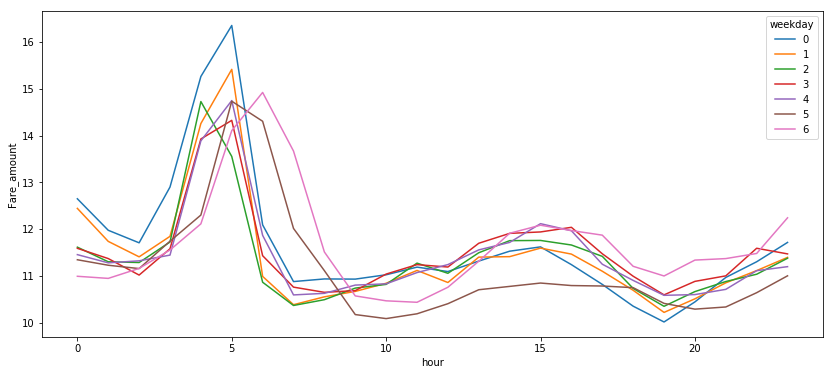

In [121]:
#loop for analyzing about 10 chunks together.
#Dependence of fare_amount on time of ride.
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df.pivot_table('fare_amount', index='hour', columns='weekday').plot(figsize=(14,6))
    plt.ylabel('Fare_amount')

In [91]:
# For this plot and further analysis, we need a function 
#to calculate the distance in miles between locations in lon,lat coordinates.
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return(0.6213712 * 12742 * np.arcsin(np.sqrt(a)))
                                        

for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df['distance'] = distance(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()

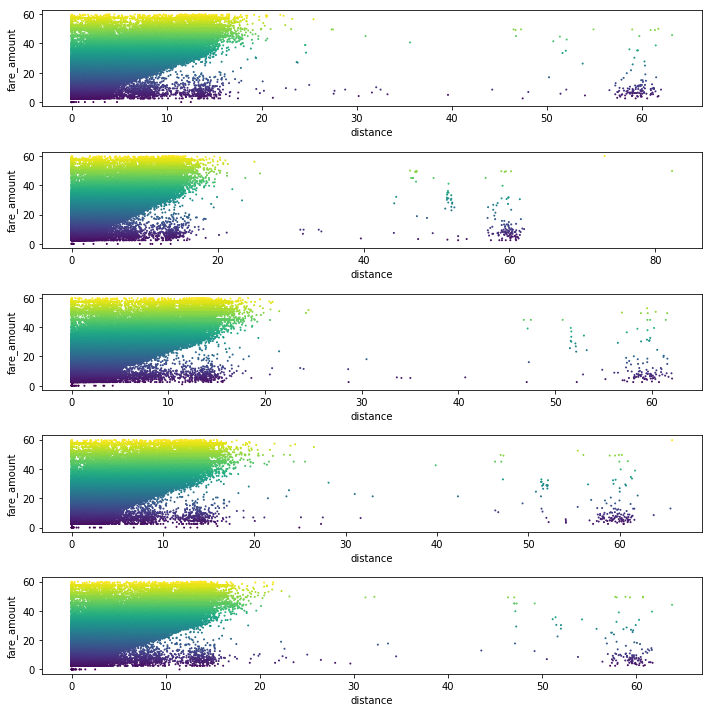

In [92]:
#Relation Between Fare_Amount And Distance
fig, axs = plt.subplots(5, 1, figsize=(10 , 10))
#loop for analyzing about 10 chunks together.
for i in range(0,5):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    im = axs[i].scatter(df['distance'] , df['fare_amount'] , c=np.clip(df.fare_amount, 0, 60), 
                     cmap='viridis', alpha=1.0, s=1)
    axs[i].set_xlabel('distance')
    axs[i].set_ylabel('fare_amount')
    
plt.tight_layout()

In [110]:
#For 0 distance also fare_amount is very high. Maybe those rides started and ended at the same loacation. 
#Predicting these fares will be difficult as there is likely not sufficient information 
#in the dataset. Also, for other distances also the variation of fare_amount 
#for same distance is very high. So, distance does not seem to help during prediction.  



In [109]:
#varation of distance travelled in test data.
test_data = test_df.copy()
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return(0.6213712 * 12742 * np.arcsin(np.sqrt(a)))
test_data['distance'] = distance(test_data['pickup_longitude'],test_data['pickup_latitude'],test_data['dropoff_longitude'],test_data['dropoff_latitude'])

test_data.describe()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,1.722966
std,0.042774,0.033541,0.039072,0.035435,1.278747,2.547583
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,0.547182
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,0.994109
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,1.808055
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,59.863893


(0, 25)

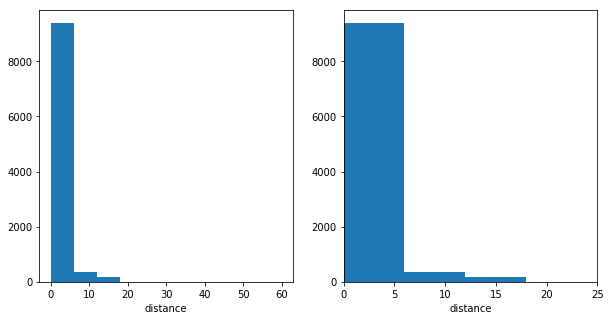

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(test_data['distance'])
axs[0].set_xlabel('distance')

#zoomed
axs[1].hist(test_data['distance'])
axs[1].set_xlabel('distance')
axs[1].set_xlim((0,25))


In [120]:
test_data.shape

(9914, 8)

In [ ]:
#for loop for analyzing about 10 chunks together.
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df.pivot_table('fare_amount', index='hour', columns='weekday').plot(figsize=(14,6))
    plt.ylabel('Fare_amount')
    

### Dependence of fare_amount on travel time

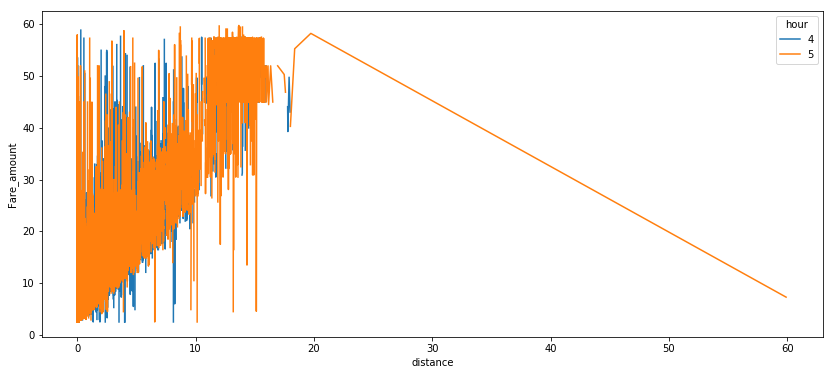

In [100]:
#analysing for only betweeen 3 to 5 because fare_amount is especially high there. 
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    idx = (df.hour>3) & (df.hour <=5)
    df[idx].pivot_table('fare_amount', index='distance', columns='hour').plot(figsize=(14,6))
    plt.ylabel('Fare_amount')
    

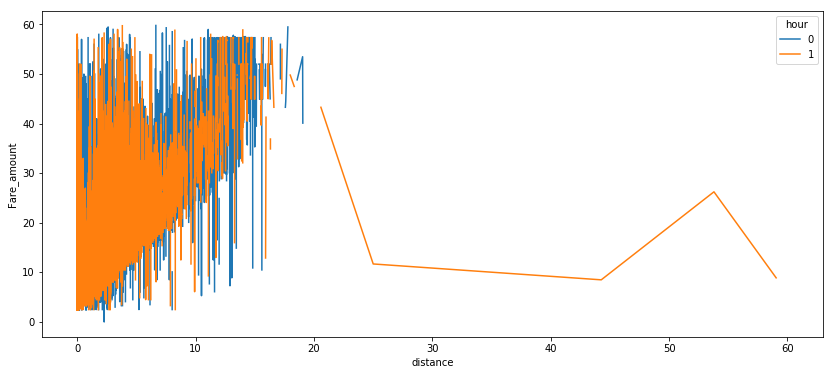

In [103]:
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    idx = (df.hour>=0) & (df.hour <2)
    df[idx].pivot_table('fare_amount', index='distance', columns='hour').plot(figsize=(14,6))
    plt.ylabel('Fare_amount')

In [123]:
#the above graphs show that maybe caluculating point to point distance is not giving 
#us the measure of actual total distance travelled.
#I found the formula to calculate distance in one other kernel.
#(https://www.kaggle.com/ojones3/feature-engineering-corrected-manhattan-distance)


#Step 1 - Calculate the difference in degrees longitude and latitude between pickup & dropoff.
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()
    
#Step 2 - Translate these values into distances (miles)
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df['abs_diff_longitude'] = df.abs_diff_longitude*50
    df['abs_diff_latitude'] = df.abs_diff_latitude*69
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()
    
#Step 3 - Use trigonometry to correct our distances
### Angle difference between north, and manhattan roadways
meas_ang = 0.506 # 29 degrees = 0.506 radians
import math

##This could be dealt with via a bounding box...

## adding extra features
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df['Euclidean'] = (df.abs_diff_latitude**2 + df.abs_diff_longitude**2)**0.5  
    df['delta_manh_long'] = (df.Euclidean*np.sin(np.arctan(df.abs_diff_longitude / df.abs_diff_latitude)-meas_ang)).abs()
    df['delta_manh_lat'] = (df.Euclidean*np.cos(np.arctan(df.abs_diff_longitude / df.abs_diff_latitude)-meas_ang)).abs()
    df['manh_length'] = df.delta_manh_long + df.delta_manh_lat
    
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()

    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in arctan
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in arctan


In [124]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,weekday,year,distance,abs_diff_longitude,abs_diff_latitude,Euclidean,delta_manh_long,delta_manh_lat,manh_length
count,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,413648.000000,4.093650e+05,409365.000000,409365.000000
mean,11.132016,-73.975241,40.751112,-73.974186,40.751472,1.685452,13.517979,6.264822,3.042715,2011.739056,1.651260,1.119067,1.458559,2.002461,6.541971e-01,1.837202,2.491399
std,8.850813,0.037911,0.029373,0.035898,0.032321,1.308015,6.526609,3.436964,1.952164,1.863398,2.344401,1.691960,1.619478,2.203472,1.068700e+00,2.003120,2.819318
min,0.000000,-74.260628,40.575167,-74.259458,40.574330,0.000000,0.000000,1.000000,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,1.622574e-08,0.000024,0.000068
25%,6.000000,-73.992327,40.736622,-73.991540,40.735780,1.000000,9.000000,3.000000,1.000000,2010.000000,0.530931,0.306850,0.477810,0.763037,1.362622e-01,0.687375,0.956802
50%,8.500000,-73.982113,40.753418,-73.980590,40.753865,1.000000,14.000000,6.000000,3.000000,2012.000000,0.962744,0.633636,0.974073,1.310574,3.299397e-01,1.221515,1.614263
75%,12.500000,-73.968330,40.767532,-73.965437,40.768373,2.000000,19.000000,9.000000,5.000000,2013.000000,1.748598,1.190263,1.865935,2.380774,6.679491e-01,2.256254,2.874654
max,59.900000,-73.100000,41.623987,-73.122307,41.625438,6.000000,23.000000,12.000000,6.000000,2015.000000,73.057118,52.020350,52.434963,69.627092,4.222580e+01,65.693791,88.764504


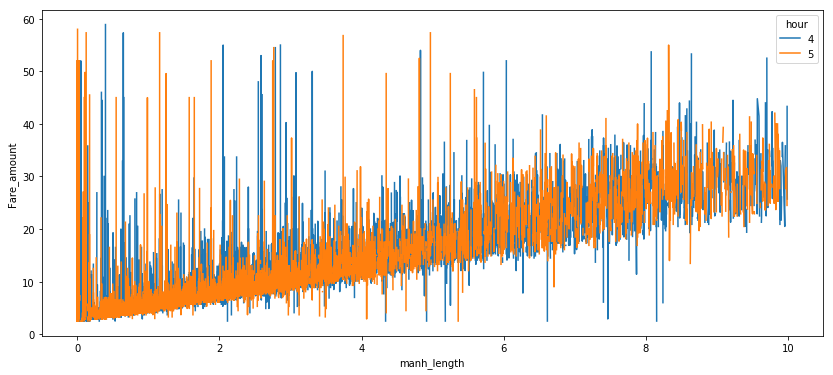

In [128]:
#analysing for only betweeen 3 to 5 because fare_amount is especially high there. 
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    idx = (df.hour>3) & (df.hour <=5) & (df.manh_length>=0) & (df.manh_length<10)
    df[idx].pivot_table('fare_amount', index='manh_length', columns='hour').plot(figsize=(14,6))
    plt.ylabel('Fare_amount')

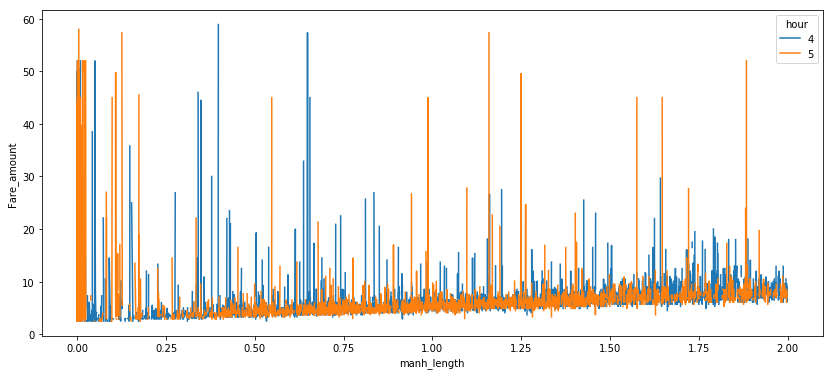

In [129]:
#analysing for only betweeen 3 to 5 because fare_amount is especially high there. 
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    idx = (df.hour>3) & (df.hour <=5) & (df.manh_length>=0) & (df.manh_length<)
    df[idx].pivot_table('fare_amount', index='manh_length', columns='hour').plot(figsize=(14,6))
    plt.ylabel('Fare_amount')

In [139]:
#remove data points with greater than 40 fare_amount.
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df = df[df['fare_amount']<40]
    
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()

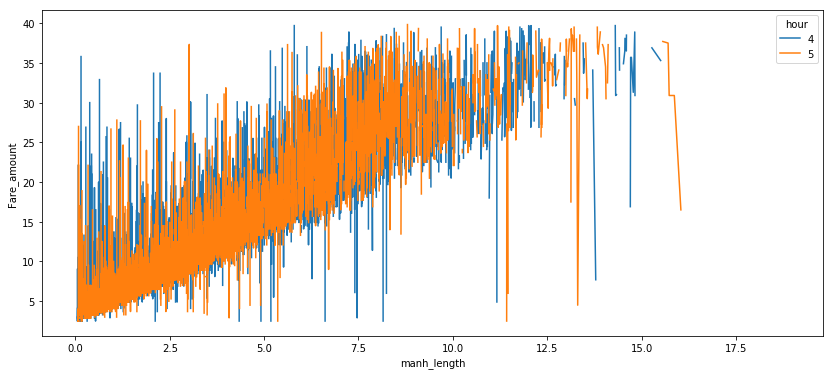

In [141]:
#analysing for only betweeen 3 to 5 because fare_amount is especially high there. 
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    idx = (df.hour>3) & (df.hour <=5)
    df[idx].pivot_table('fare_amount', index='manh_length', columns='hour').plot(figsize=(14,6))
    plt.ylabel('Fare_amount')

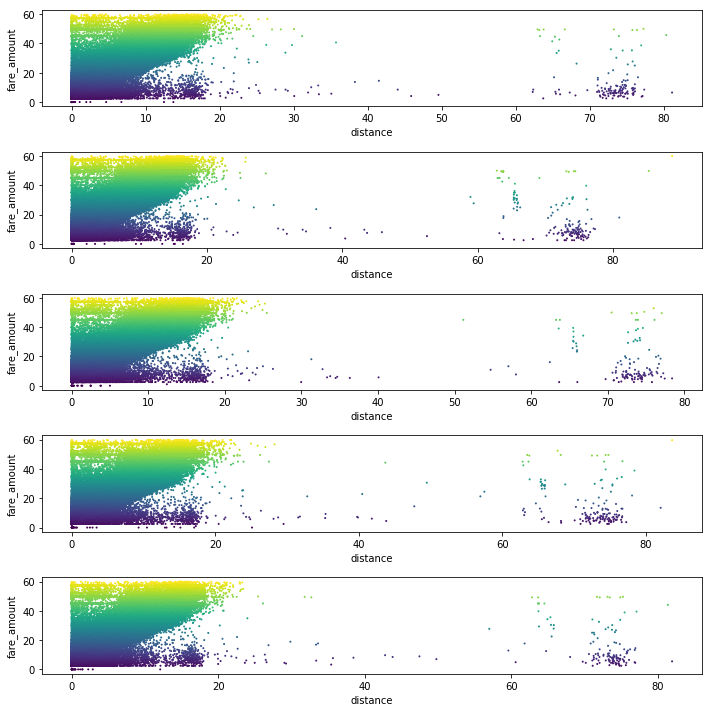

In [130]:
#Relation Between Fare_Amount And Distance
fig, axs = plt.subplots(1, figsize=(10 , 10))
#loop for analyzing about 5 chunks together.
for i in range(0,5):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    im = axs[i].scatter(df['manh_length'] , df['fare_amount'] , c=np.clip(df.fare_amount, 0, 60), 
                     cmap='viridis', alpha=1.0, s=1)
    axs[i].set_xlabel('distance')
    axs[i].set_ylabel('fare_amount')
    
plt.tight_layout()

In [132]:
#lets drop data points with greater than 20 of manh_length because the disance covered in test data
#is also within that range only.

for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df = df[df['manh_length']<=20]
    df = df[df['manh_length']>=0]
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()

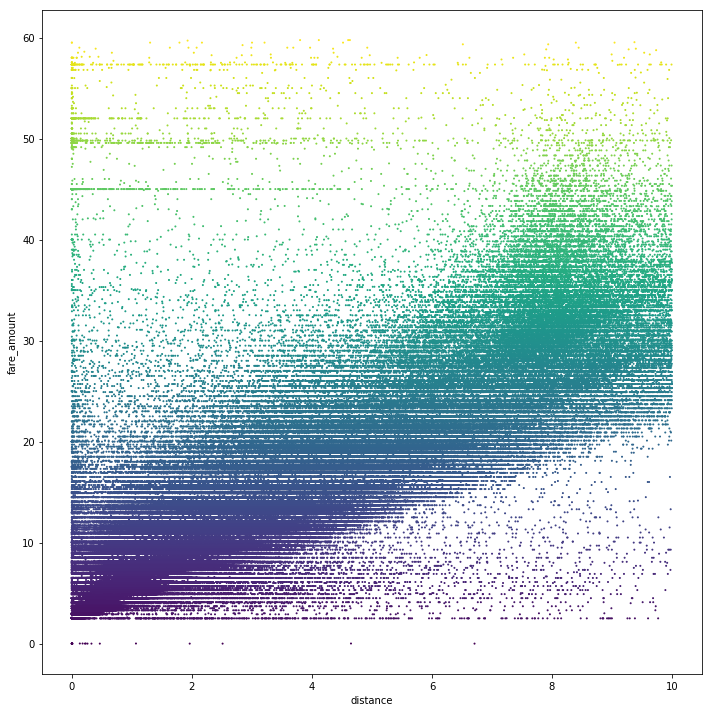

In [136]:
#Relation Between Fare_Amount And Distance
fig, axs = plt.subplots(1, 1, figsize=(10 , 10))
#loop for analyzing about 10 chunks together.
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    idx = df.manh_length<=10
    axs.scatter(df[idx].manh_length , df[idx].fare_amount , c=np.clip(df[idx].fare_amount, 0, 60), 
                     cmap='viridis', alpha=1.0, s=1)
    axs.set_xlabel('distance')
    axs.set_ylabel('fare_amount')
    
plt.tight_layout()

In [137]:
#clearly a linear dependence expect for few points near 0 distance. Lets remove them.
#lets drop data points with greater than 20 of manh_length because the disance covered in test data
#is also within that range only.

for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df = df[df['manh_length']>=0.05]
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()

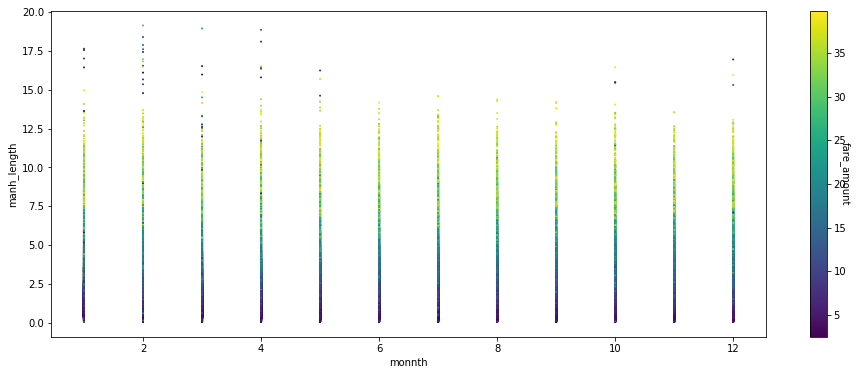

In [152]:
#Dependence of fare_amount on month. 
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    fig, axs = plt.subplots(1 , 1, figsize=(16,6))
    idx = (df['year']== 2014)
    im = axs.scatter(df[idx].month, df[idx].manh_length, c=np.clip(df[idx].fare_amount, 0, 60), 
                     cmap='viridis', alpha=1.0, s=1)
    axs.set_xlabel('monnth')
    axs.set_ylabel('manh_length')
    
    cbar = fig.colorbar(im, ax=axs)
    cbar.ax.set_ylabel('fare_amount', rotation=270)
    

In [153]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,weekday,year,distance,abs_diff_longitude,abs_diff_latitude,Euclidean,delta_manh_long,delta_manh_lat,manh_length
count,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,938102.000000,9.381020e+05,938102.000000,938102.000000
mean,10.185862,-73.977940,40.752069,-73.975932,40.752290,1.683712,13.521926,6.261755,3.041666,2011.730422,1.432622,0.961381,1.364865,1.820286,5.619380e-01,1.659799,2.221737
std,6.362629,0.027483,0.024577,0.028310,0.028815,1.307174,6.526083,3.438993,1.948307,1.862599,1.586168,1.151246,1.304215,1.581144,8.233937e-01,1.436931,1.982477
min,0.000000,-74.258187,40.575871,-74.254837,40.573345,0.000000,0.000000,1.000000,0.000000,2009.000000,0.010384,0.000000,0.000000,0.035658,2.007295e-07,0.017897,0.050034
25%,6.000000,-73.992415,40.737296,-73.991610,40.736562,1.000000,9.000000,3.000000,1.000000,2010.000000,0.539525,0.313250,0.489555,0.774099,1.345851e-01,0.684149,0.952001
50%,8.100000,-73.982263,40.753742,-73.980770,40.754211,1.000000,14.000000,6.000000,3.000000,2012.000000,0.954956,0.628150,0.970485,1.301125,3.217337e-01,1.198951,1.586717
75%,12.100000,-73.969307,40.767721,-73.966210,40.768570,2.000000,19.000000,9.000000,5.000000,2013.000000,1.687289,1.147250,1.812078,2.297186,6.372427e-01,2.162298,2.752810
max,39.940000,-73.089387,41.696852,-73.110500,41.646975,6.000000,23.000000,12.000000,6.000000,2015.000000,19.406073,14.043350,14.982177,16.743972,1.221686e+01,16.587854,19.143832


In [154]:
#lets remove reduntant features.
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df.drop(columns = 'Euclidean',inplace = True)
    df.drop(columns = 'distance',inplace = True)
    
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()
